#Trabalho Unicarioca 2024
#Análise de média móvel e envelope de Bollinger
#Matricula: 2024000054
#Nome: Matheus de Amorim Pereira
#Banco analisado: Itau

# ANÁLISE 1

In [ ]:
install.packages("quantmod")
library(quantmod)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [ ]:
#Definindo ticker
ticker <- "ITUB4.SA"

#Periodo
start_date <- "2020-01-01"
end_date <- Sys.Date()  # Data atual

In [ ]:
#Baixando dados
getSymbols(ticker, src = "yahoo", from = start_date, to = end_date)

[1] "ITUB4.SA"

In [ ]:
#Dataframe Ajustado
itau <- na.omit(Ad(get(ticker)))
head(itau)

           ITUB4.SA.Adjusted
2020-01-02          31.51148
2020-01-03          31.18006
2020-01-06          30.71605
2020-01-07          30.00345
2020-01-08          29.51458
2020-01-09          28.92627

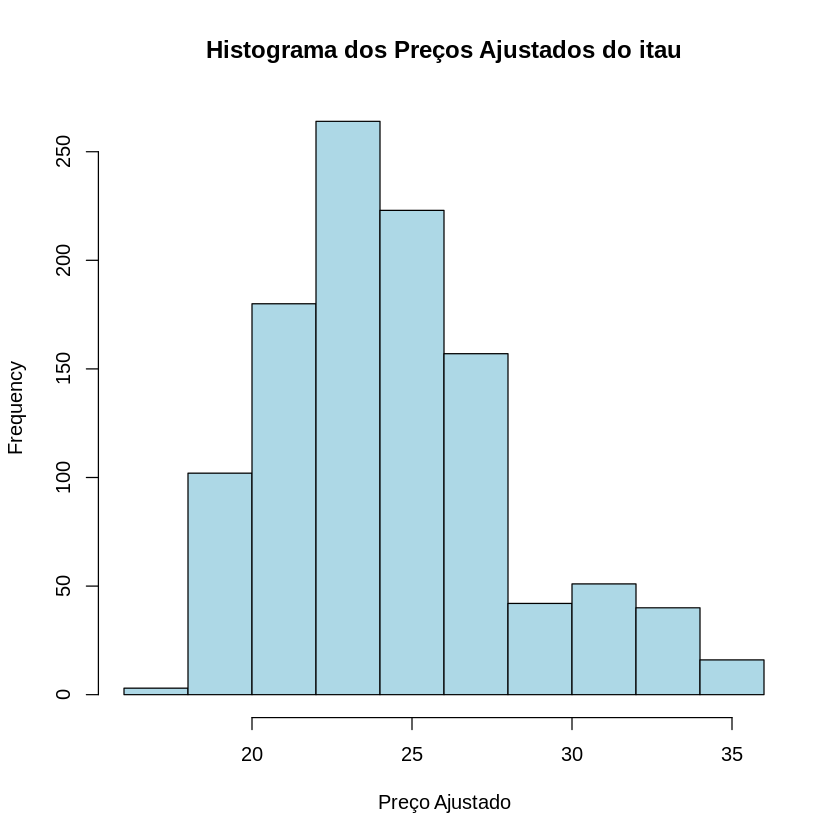

In [ ]:
#Histograma preço ajustado (Resultados possíveis para análise: De acordo com os preços ajustados as ações variam entre 20 - 25)
hist(itau, main = "Histograma dos Preços Ajustados do itau", xlab = "Preço Ajustado", col = "lightblue")

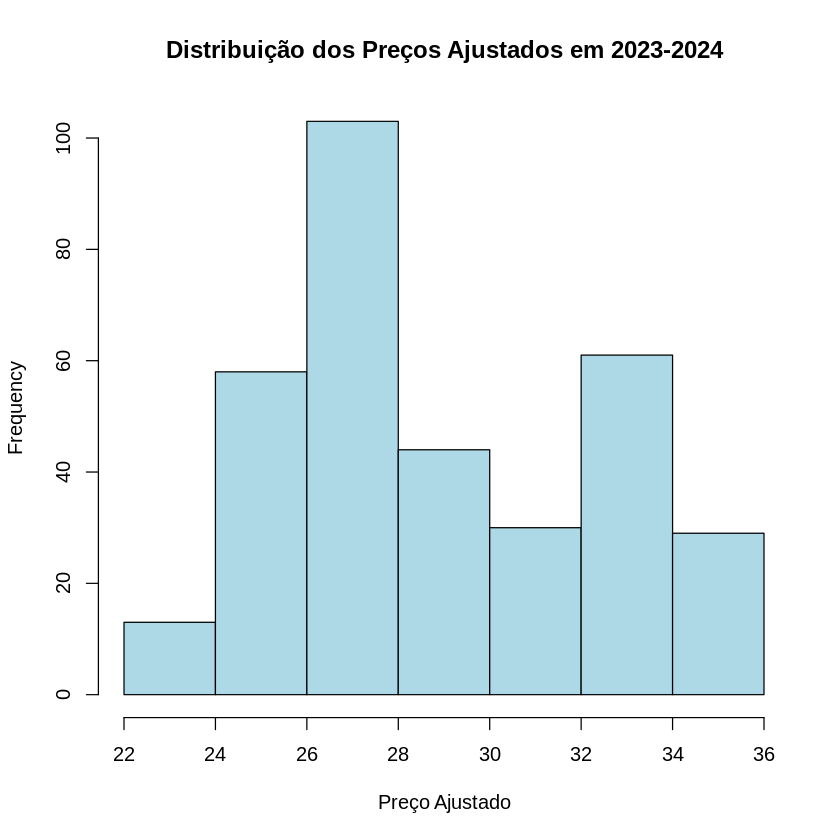

In [ ]:
# Filtrando os dados para os períodos de 2023 e 2024
precos_ajustados_2023_2024 <- precos_ajustados["2023/2024"]

# Plotando o histograma dos preços ajustados para os períodos de 2023 e 2024
hist(precos_ajustados_2023_2024, breaks = "FD", col = "lightblue", main = "Distribuição dos Preços Ajustados em 2023-2024",
     xlab = "Preço Ajustado")


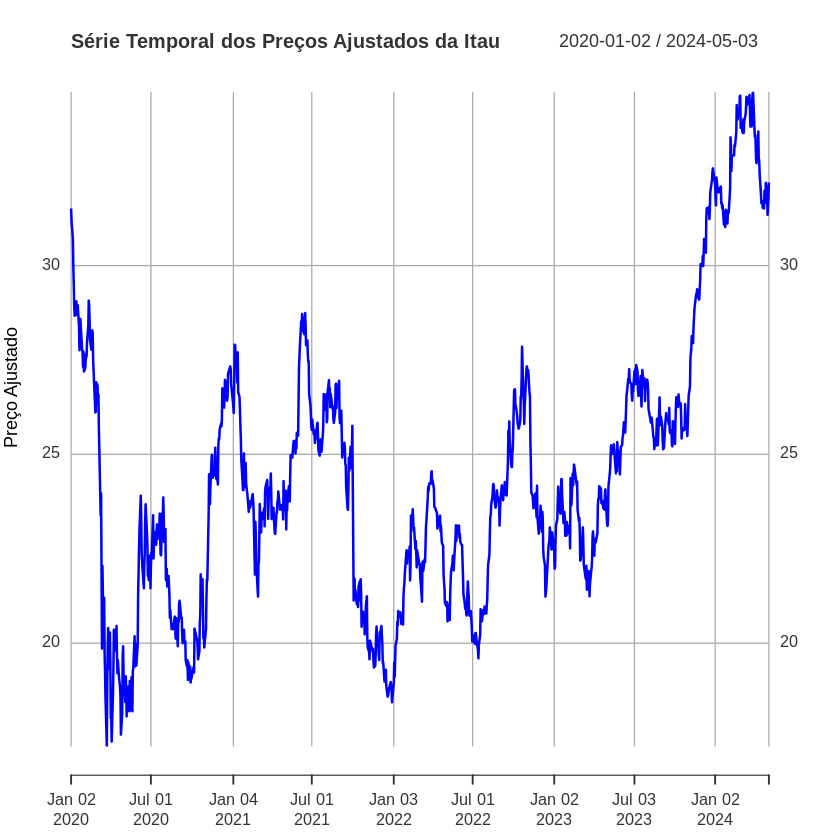

In [ ]:
# Serie temporal (Resultados possíveis para análise: Através da visualização do gráfico abaixo juntamente com histogramaa é possível verificar que as ações
#do itáu estão em alta, com uma leve baixa no período atual, mesmo assim o preço está acima do valor médio que é de 20-25)
plot(itau, main = "Série Temporal dos Preços Ajustados da Itau", ylab = "Preço Ajustado", col = "blue")


# **ANÁLISE 2**


In [ ]:
# Instalando e carregando as bibliotecas necessárias
install.packages("quantmod")
library(quantmod)

# Definindo o ticker da Petrobras
ticker <- "ITUB4.SA"

# Definindo o período desejado
start_date <- "2020-01-01"
end_date <- Sys.Date()  # Data atual

# Baixando os dados da Petrobras da Bovespa
getSymbols(ticker, src = "yahoo", from = start_date, to = end_date)

# Verificando a estrutura dos dados baixados
str(ITUB4.SA)

# Extraindo os preços ajustados
precos_ajustados <- Cl(ITUB4.SA)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "ITUB4.SA"

An xts object on 2020-01-02 / 2024-05-10 containing: 
  Data:    double [1083, 6]
  Columns: ITUB4.SA.Open, ITUB4.SA.High, ITUB4.SA.Low, ITUB4.SA.Close, ITUB4.SA.Volume ... with 1 more column
  Index:   Date [1083] (TZ: "UTC")
  xts Attributes:
    $ src    : chr "yahoo"
    $ updated: POSIXct[1:1], format: "2024-05-11 13:29:11"


In [ ]:
#Média moveis (curto/longo prazo)
ITUB4.SA$SMA20 <- SMA(precos_ajustados, n = 20)
ITUB4.SA$SMA50 <- SMA(precos_ajustados, n = 50)


In [ ]:
# Calculando os envelopes de Bollinger (Volatilidade do mercado/análise de preços por período)
n <- 20  # Período para os envelopes de Bollinger
ITUB4.SA$SDB <- BBands(precos_ajustados, n = n, maType = "SMA", sd = 2)$dn
ITUB4.SA$SDT <- BBands(precos_ajustados, n = n, maType = "SMA", sd = 2)$up

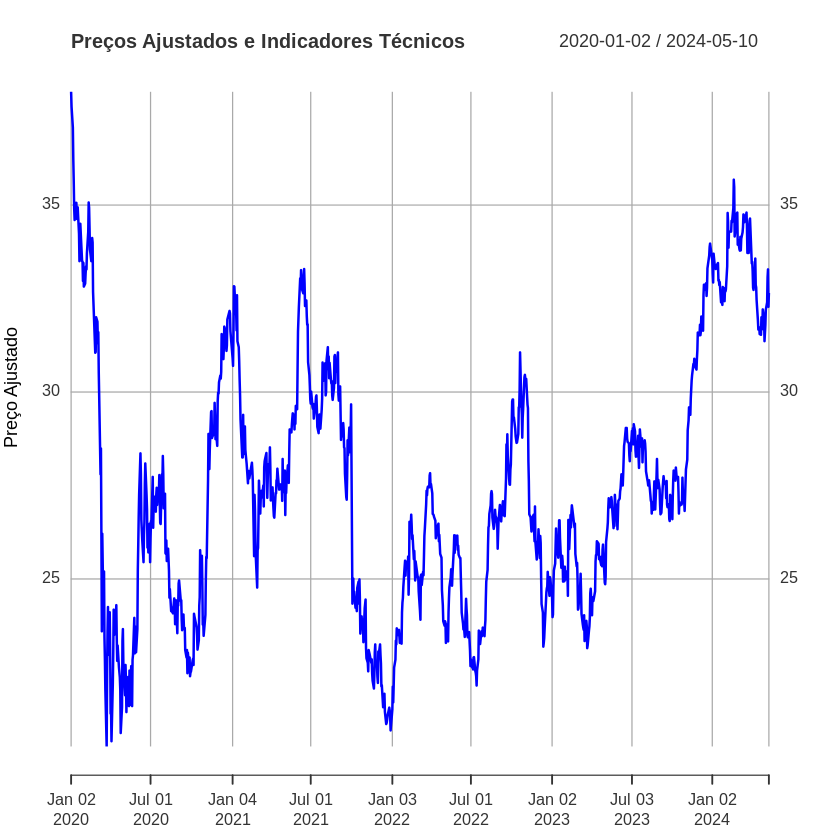

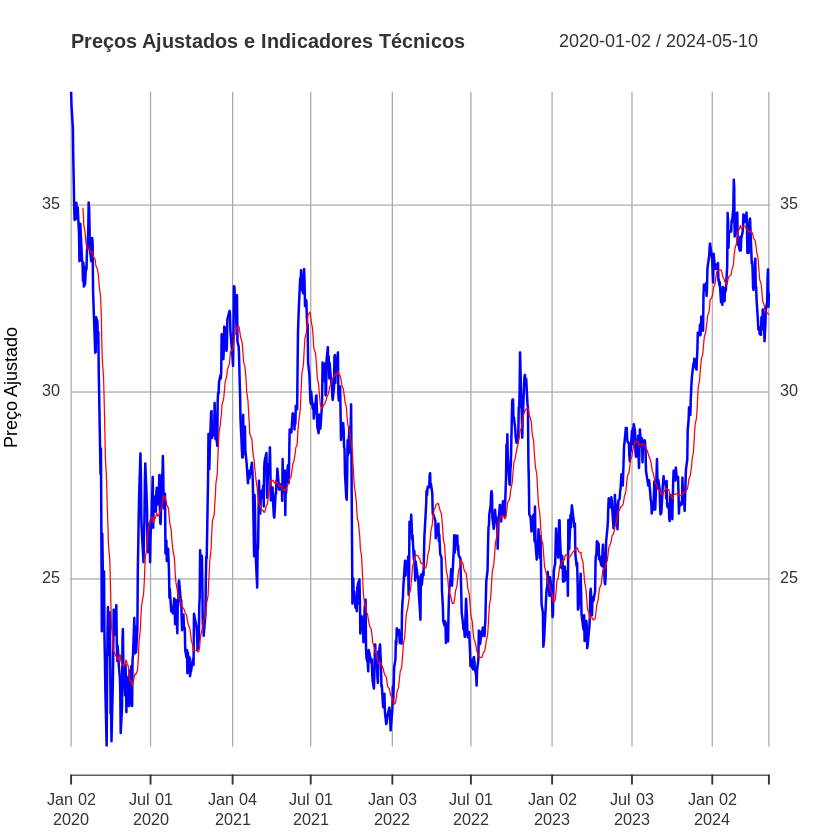

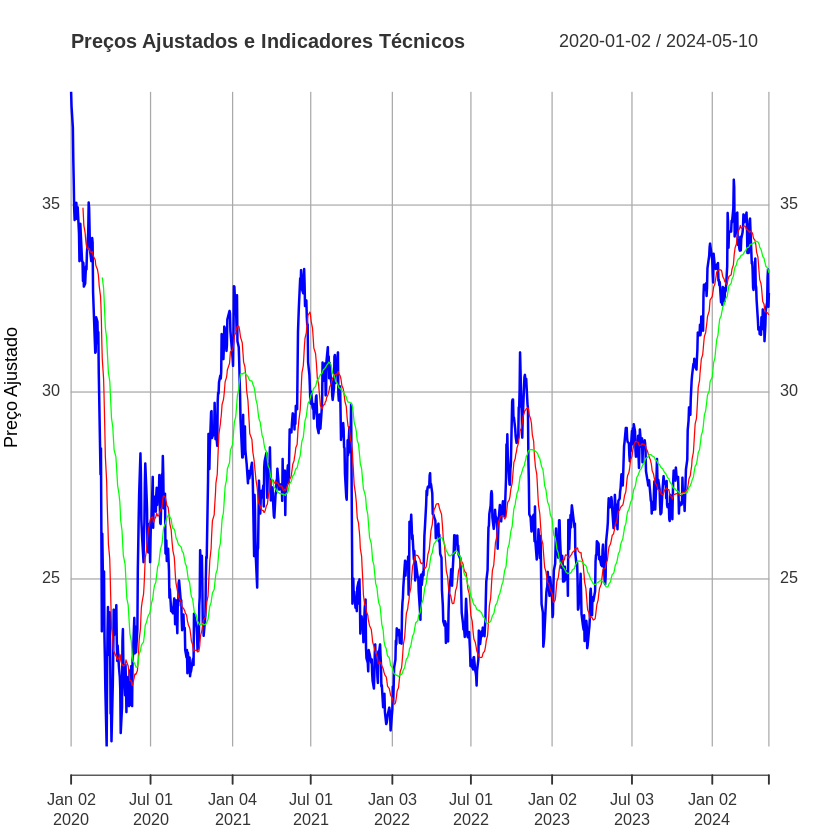

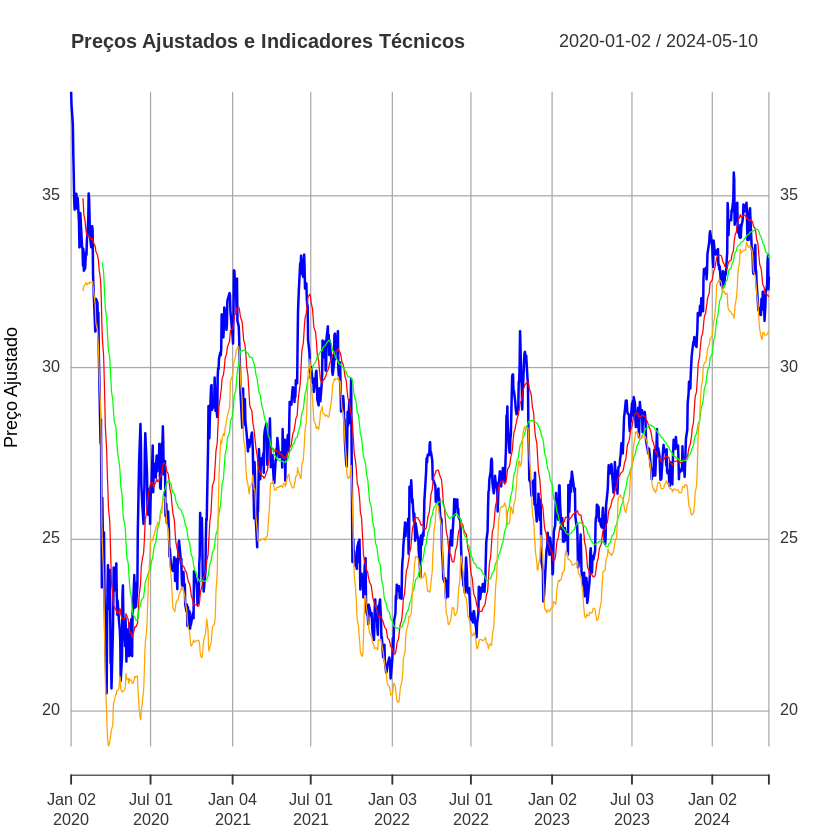

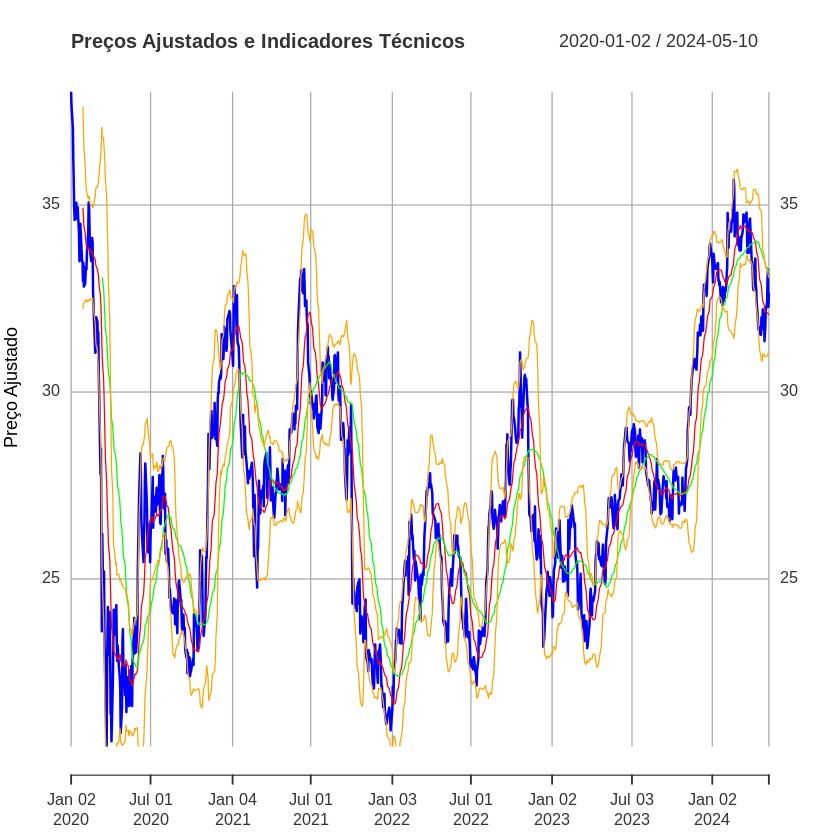

In [ ]:
# Plotando os preços ajustados com médias móveis e envelopes de Bollinger
plot(precos_ajustados, type = "l", col = "blue", main = "Preços Ajustados e Indicadores Técnicos",
     ylab = "Preço Ajustado")
lines(ITUB4.SA$SMA20, col = "red")
lines(ITUB4.SA$SMA50, col = "green")
lines(ITUB4.SA$SDB, col = "orange")
lines(ITUB4.SA$SDT, col = "orange")

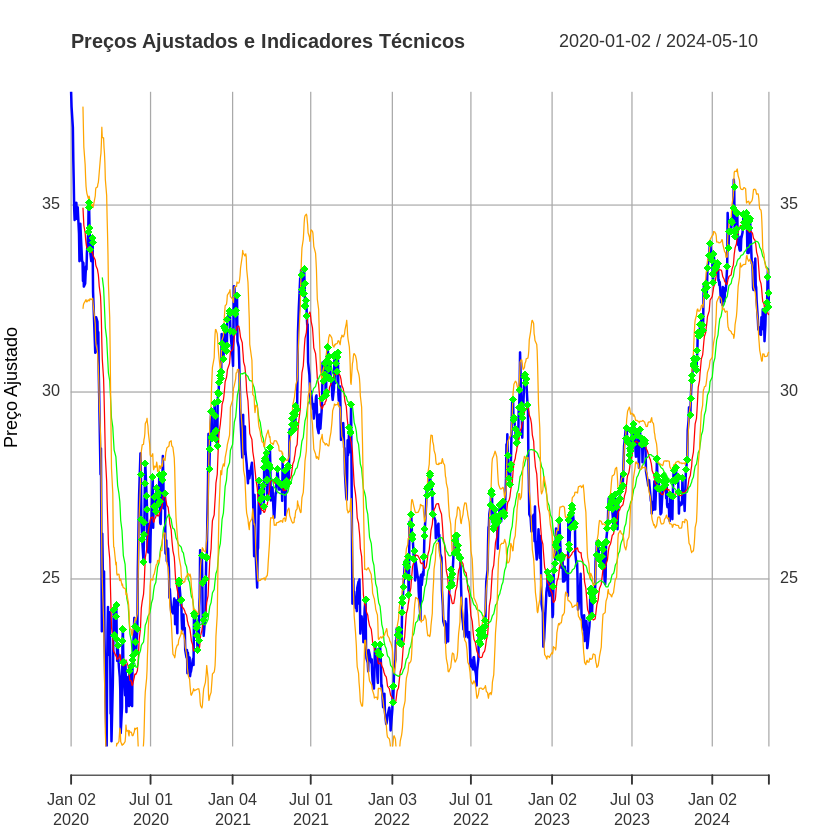

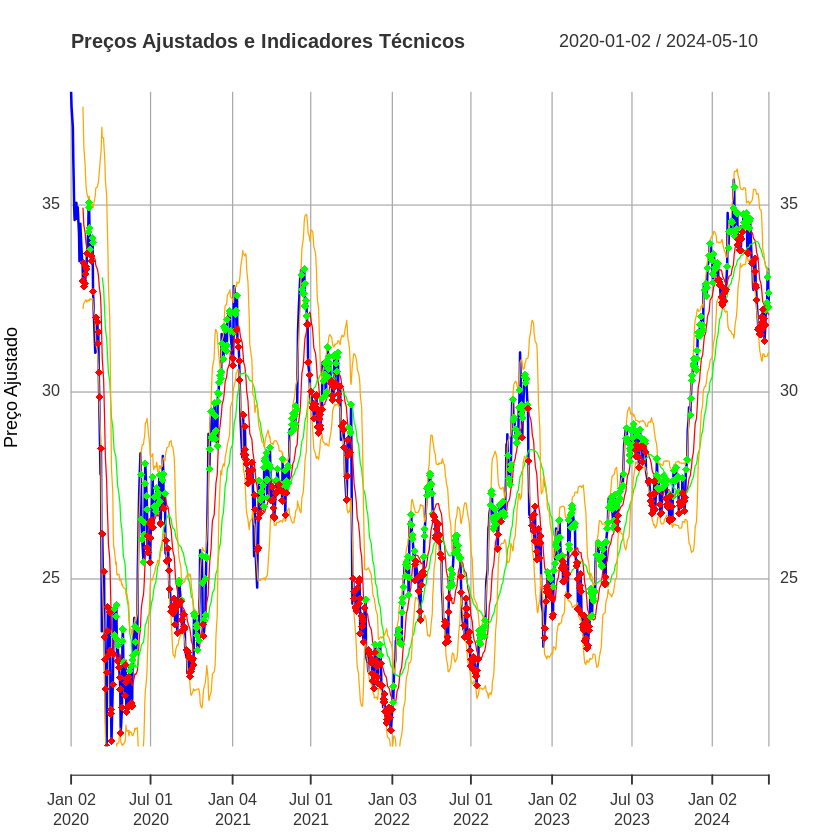

In [ ]:
# Adicionando sugestões de compra e venda
# Se o preço cruzar acima da média móvel de curto prazo e estiver abaixo do envelope superior de Bollinger, é um sinal de compra
# Se o preço cruzar abaixo da média móvel de curto prazo e estiver acima do envelope inferior de Bollinger, é um sinal de venda
signals <- rep(NA, length(precos_ajustados))
signals[precos_ajustados > ITUB4.SA$SMA20 & precos_ajustados < ITUB4.SA$SDT] <- 1  # Compra
signals[precos_ajustados < ITUB4.SA$SMA20 & precos_ajustados > ITUB4.SA$SDB] <- -1  # Venda
points(precos_ajustados[signals == 1], col = "green", pch = 18)
points(precos_ajustados[signals == -1], col = "red", pch = 18)


**Análise final dos gráficos obtidos**:
Os preços atuais para o banco Itáu indicam possíveis sugestões a ser realizadas, visto que alguns preços cruzam abaixo da média móvel é próximo dos envelopes inferiores de bollinger, podendo ser um demonstrativo de que estão em intervalo interessante para venda, de acordo com a volatidade do mercado. Da mesma forma no momento mais recente do gráfico, alguns valores cruzam acima da média móvel e abaixo do envelope superior sugerindo a compra.

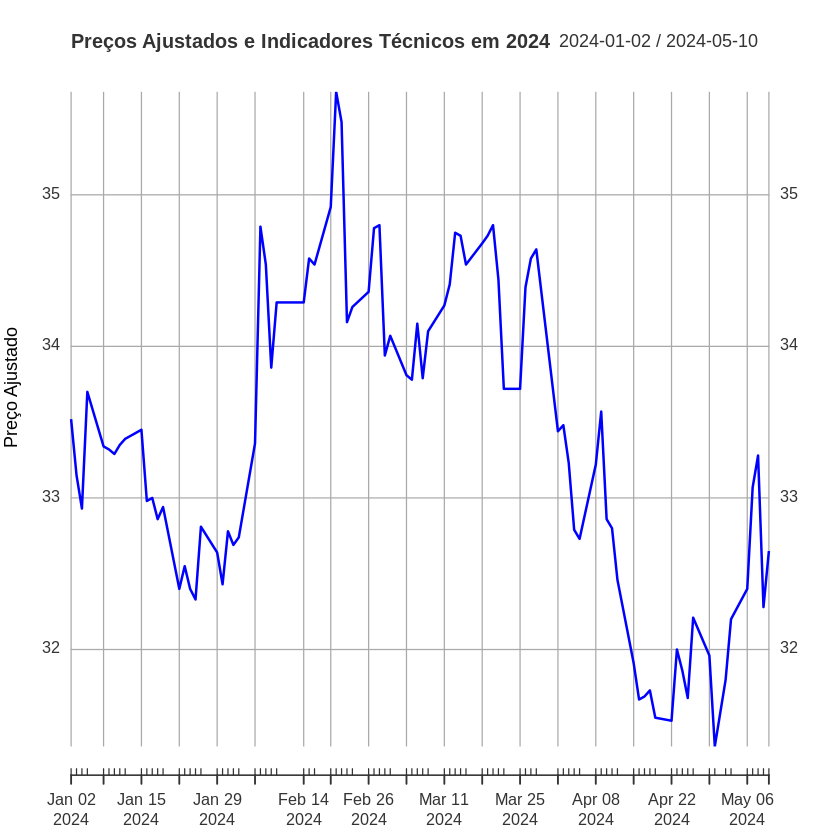

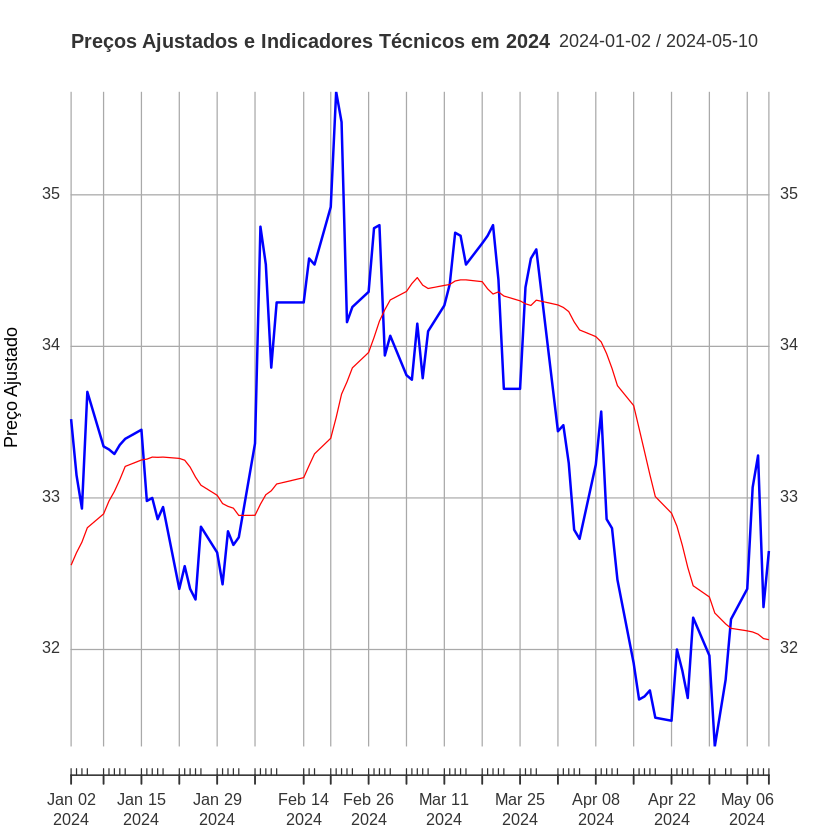

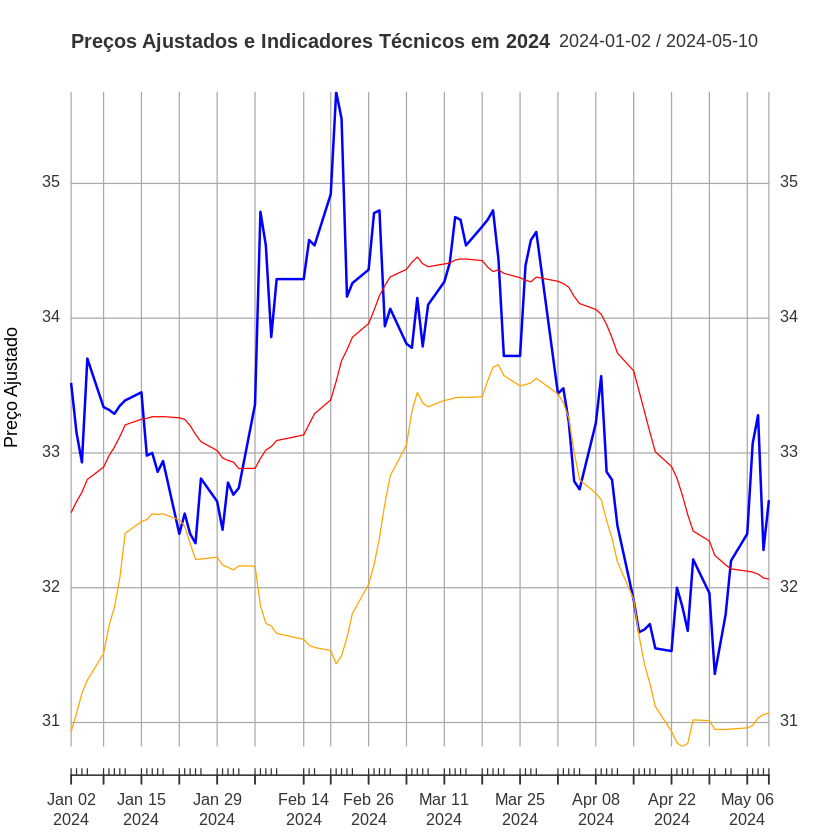

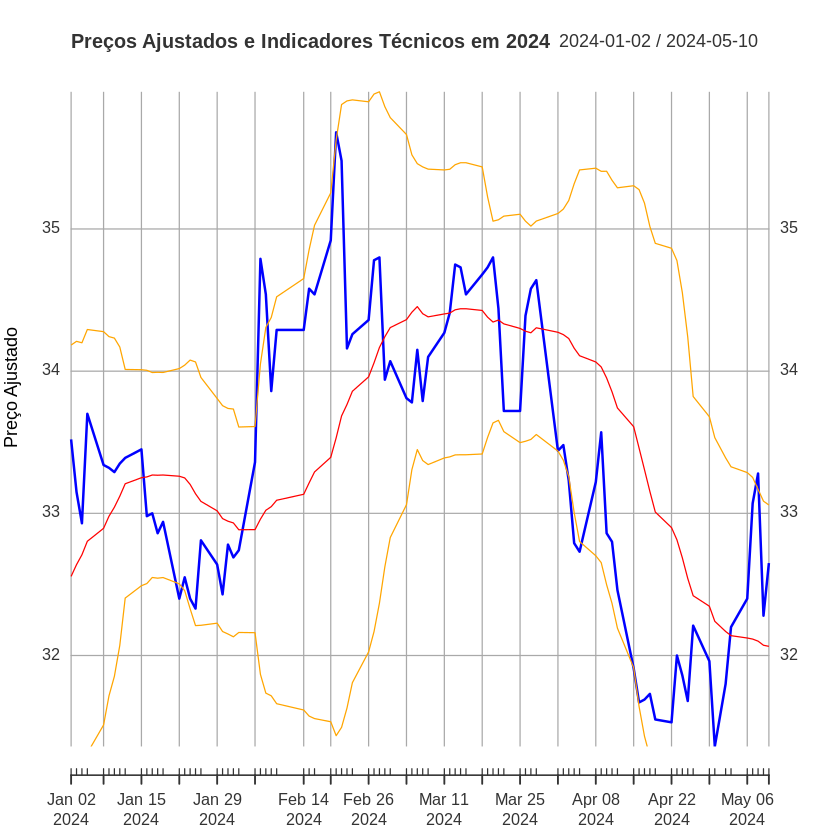

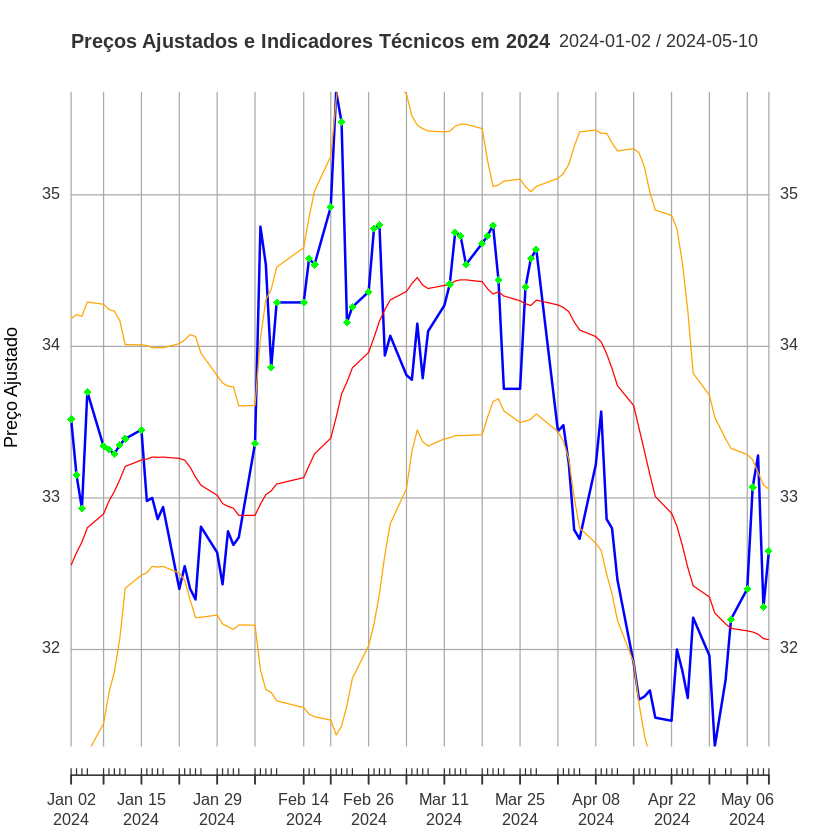

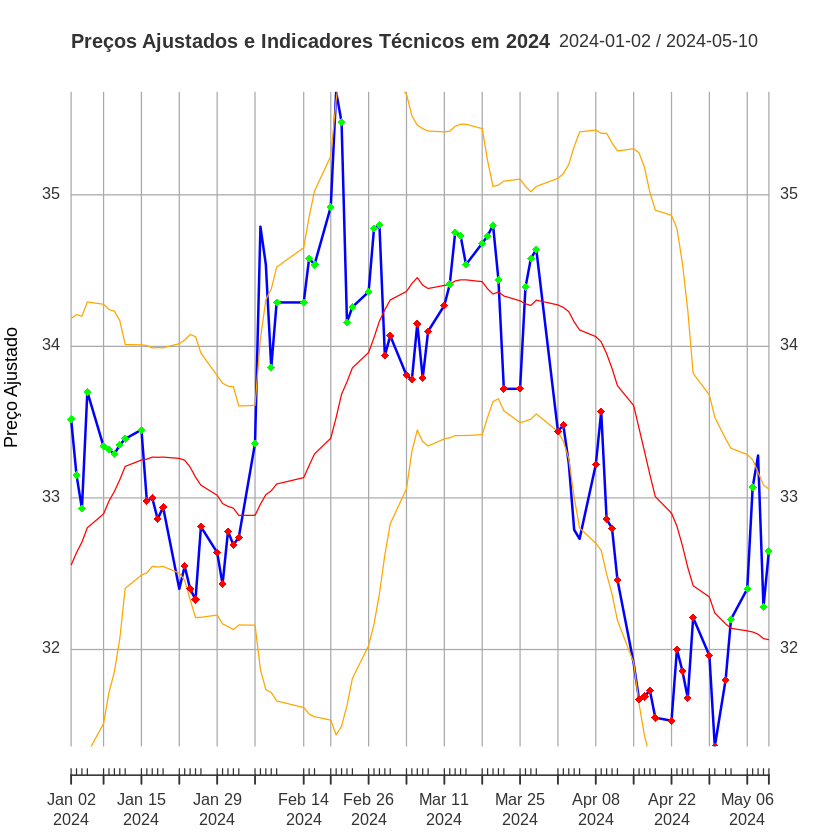

In [ ]:
# Filtro dos dados para o período de 2024
precos_ajustados_2024 <- precos_ajustados["2024"]
SMA20_2024 <- ITUB4.SA$SMA20["2024"]
SDT_2024 <- ITUB4.SA$SDT["2024"]
SDB_2024 <- ITUB4.SA$SDB["2024"]

# Criação dos sinais de compra e venda para o período de 2024
signals_2024 <- rep(NA, length(precos_ajustados_2024))
signals_2024[precos_ajustados_2024 > SMA20_2024 & precos_ajustados_2024 < SDT_2024] <- 1  # Compra
signals_2024[precos_ajustados_2024 < SMA20_2024 & precos_ajustados_2024 > SDB_2024] <- -1  # Venda

# Plotagem dos preços ajustados com médias móveis e envelopes de Bollinger para o período de 2024
plot(precos_ajustados_2024, type = "l", col = "blue", main = "Preços Ajustados e Indicadores Técnicos em 2024",
     ylab = "Preço Ajustado", xlab = "Data")
lines(SMA20_2024, col = "red")
lines(SDB_2024, col = "orange")
lines(SDT_2024, col = "orange")

# Adição dos pontos para indicar os sinais de compra e venda em 2024
points(precos_ajustados_2024[signals_2024 == 1], col = "green", pch = 18)
points(precos_ajustados_2024[signals_2024 == -1], col = "red", pch = 18)


